# KC Regression Modeling

We are now in the business end of our project, all of the data cleaning and engineering has led us to this point, modeling! As a reminder the goal of this data science project is to create a regression model that best predicts the 'price' variable in the King County historical house data set. If we were to use this model in the future, we should be able to predict a home's value by using our model.

Basic information about some of the less intuitive variables can be found in the key followed by links below:
    
id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r 

https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html


In [31]:
# Import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sms
from sklearn.feature_selection import RFE

In [113]:
#import data

#kc_housing_full = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_full.csv')
#kc_house_properties_dropped = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_house_properties_dropped.csv')
#kc_housing_most_common = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_most_common.csv')
#kc_housing_mean = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_mean.csv')
#kc_housing_median = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_median.csv')
kc_housing_mean.head()

,Unnamed: 0,price,sqft_living,sqft_lot,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,...,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,bathrooms_1,bathrooms_2,bathrooms_3,log_sqft_living15,log_sqft_lot,log_price
0,0,0.81,370,0.52,0,0,47.62,-122.31,0.48,3861,...,0,0,0,0,1,0,0,7.20,8.64,12.31
1,1,0.27,370,0.36,0,0,47.73,-122.36,0.28,1756,...,0,0,0,0,1,0,0,7.43,8.89,13.20
2,2,0.84,370,0.89,0,0,47.64,-122.36,0.36,2640,...,0,0,0,0,1,0,0,7.91,9.21,12.10
3,3,0.65,370,0.25,0,0,47.68,-122.32,0.36,3090,...,0,0,1,0,1,0,0,7.22,8.52,13.31
4,4,0.18,370,0.76,0,0,47.52,-122.19,0.51,2025,...,0,0,0,0,0,1,0,7.50,9.00,13.14


### We will be using multi linear regression in an attempt to better understand how to best predict the price of a home in King County.

In [114]:
#deal with unnamed column 
#kc_house_properties_dropped = kc_house_properties_dropped.drop(['Unnamed: 0'], axis=1)
#kc_housing_most_common = kc_housing_most_common.drop(['Unnamed: 0'], axis=1)
kc_housing_mean = kc_housing_mean.drop(['Unnamed: 0'], axis=1)
#kc_housing_median = kc_housing_median.drop(['Unnamed: 0'], axis=1)
#kc_housing_full = kc_housing_full.drop(['Unnamed: 0'], axis=1)

#kc_housing_price.shape

Creating a function that creates a test/train split on the data, cross validation, and feature seletion: https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb

At the beginning of the project we split the data into multiple data frames. At this point, since our project is focused on a model for first time home buyers, the kc_house_properties_dropped dataframe will not be used since the outliers were kept. Below is the model for every other data frame. 

In [136]:
# This is set of function for performing linear regression and validating results

def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # Errors
    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
    
    # Visualization of selection of 100 house prices
    plt.figure(figsize=(16,6))
    sns.lineplot(range(len(y_pred[:200])), y_pred[:200], label='Predicted Prices',color ='c', markers = True)
    sns.lineplot(range(len(y_pred[:200])), y_test[:200], label='Actual Prices', color = 'navy', markers = True)
    plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 20}), plt.xlabel('Values'), plt.ylabel('Prices')
    plt.legend(), plt.show()
    return (linreg, y_pred, y_test)

def cross_validation(X, y, cv=15, show_scores=False):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

R^2 Score: 0.76
Mean Absolute Error: 0.07408
Root Mean Squared Error: 0.10881
-----------------------------------
Average Predicted Price: 0.4811
Average Actual Price: 0.4906


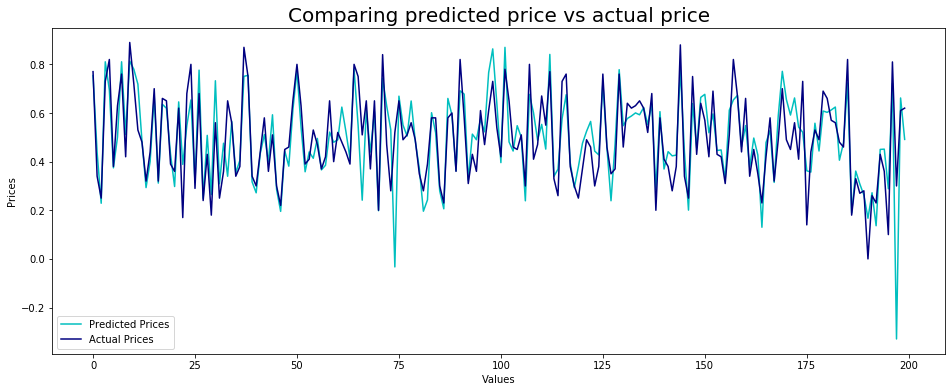

In [137]:
X = kc_housing_median.drop(['price'],axis=1)
y = kc_housing_median.price

linreg, y_pred, y_test = linear_regression(X, y)

R^2 Score: 0.98
Mean Absolute Error: 0.02148
Root Mean Squared Error: 0.03491
-----------------------------------
Average Predicted Price: 0.4916
Average Actual Price: 0.4937


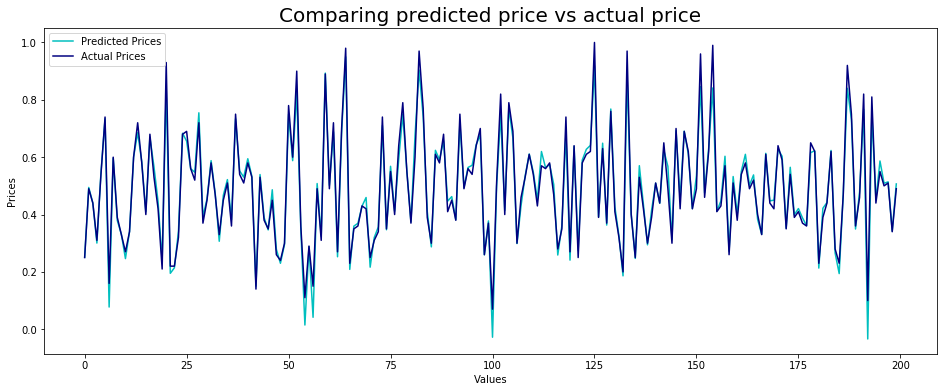

In [138]:
X = kc_housing_full.drop(['price'],axis=1)
y = kc_housing_full.price

linreg, y_pred, y_test = linear_regression(X, y)

R^2 Score: 0.78
Mean Absolute Error: 0.07231
Root Mean Squared Error: 0.10258
-----------------------------------
Average Predicted Price: 0.4946
Average Actual Price: 0.4919


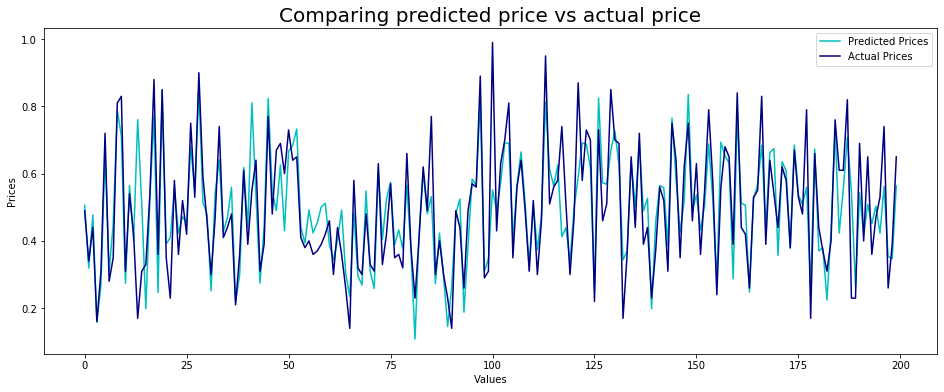

In [139]:
X = kc_housing_most_common.drop(['price'],axis=1)
y = kc_housing_most_common.price

linreg, y_pred, y_test = linear_regression(X, y)

R^2 Score: 0.75
Mean Absolute Error: 0.08341
Root Mean Squared Error: 0.10892
-----------------------------------
Average Predicted Price: 0.4877
Average Actual Price: 0.4967


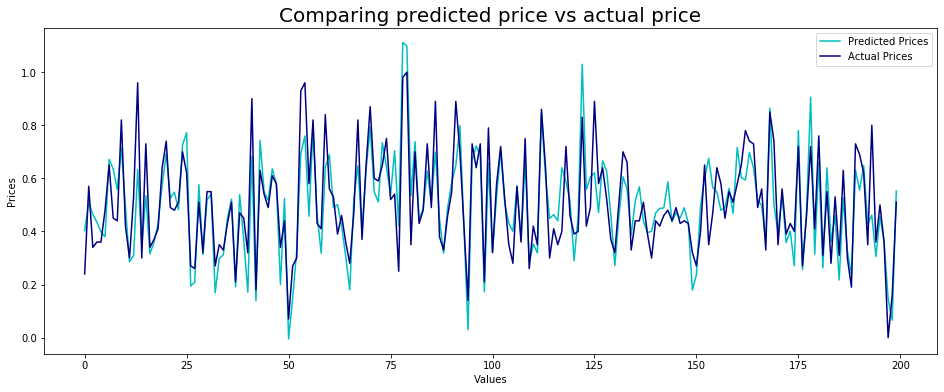

In [140]:
X = kc_housing_mean.drop(['price'],axis=1)
y = kc_housing_mean.price

linreg, y_pred, y_test = linear_regression(X, y)

The multivariate analysis returned a variety of results likely depending on how we treated missing values. The kc_housing_full data set is likely overtrained with an R^2 of .98 while the kc_housing_mean is the lowest performer at .74. The kc_housing_median and kc_housing_most_common fall at .79 and .78 which indicates that both models are highly correlated to the test set but not as closely as the kc_housing_full. The median and most_common models are the two models we will move on with as viable models for our housing search as these would likely have the flexibility to perform on real housing data. With room to improve however, let's look at which variables have the most impact in these two models. 

In [141]:
significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

Significant features: 74 
All features: 169


R^2 Score: 0.74
Mean Absolute Error: 0.07682
Root Mean Squared Error: 0.10088
-----------------------------------
Average Predicted Price: 0.4852
Average Actual Price: 0.4946


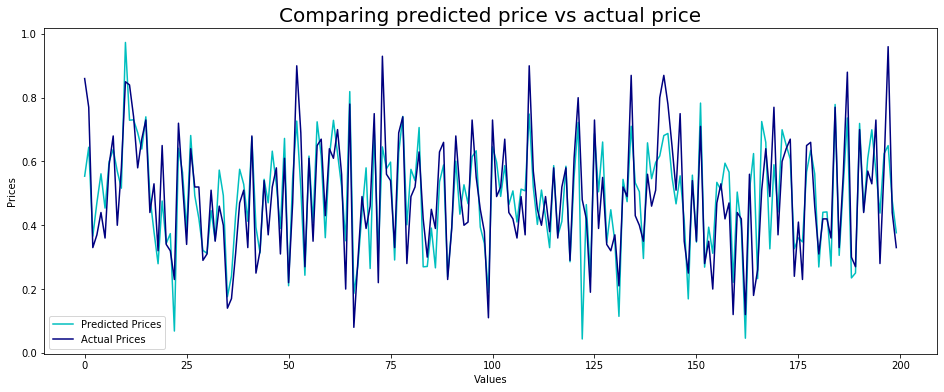

In [142]:
X = kc_housing_most_common[significant_features]
y = kc_housing_most_common.price
linreg, y_pred, y_test = linear_regression(X, y)

In [110]:
features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

,Features
zipcode_98075,0.765415
zipcode_98004,0.740147
zipcode_98105,0.705379
zipcode_98052,0.691567
zipcode_98112,0.671208


R^2 Score: 0.73
Mean Absolute Error: 0.07668
Root Mean Squared Error: 0.10111
-----------------------------------
Average Predicted Price: 0.4954
Average Actual Price: 0.4976


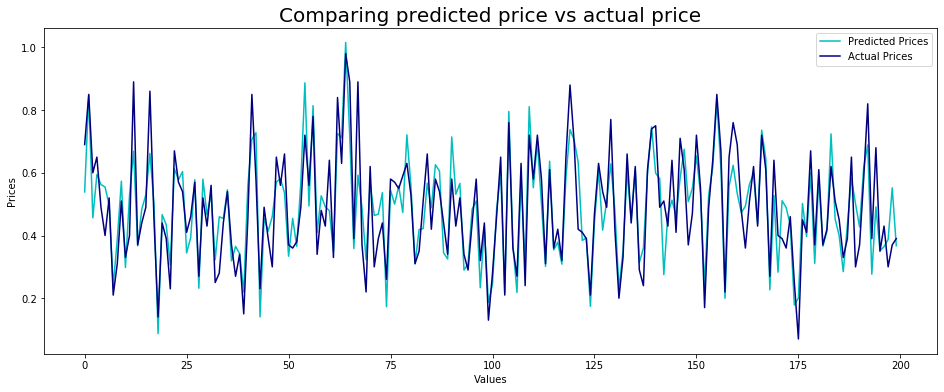

In [143]:
X = kc_housing_median[significant_features]
y = kc_housing_median.price
linreg, y_pred, y_test = linear_regression(X, y)

In [112]:
features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

,Features
zipcode_98004,0.753989
zipcode_98053,0.677368
zipcode_98112,0.669149
zipcode_98105,0.647917
zipcode_98102,0.642468


According to both of our selected models, the variables with highest impact are zipcode. However, after narrowing it down do these select features, it is the kc_housing_median dataframe that performs the best! 